# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Shiba Inu Dislodges FTX In Average Quantity Held, WhaleStats Report Shows.  The crypto market has been in a sorry state for several months now. Meme tokens like Shiba Inu (SHIB) took the worst blow following the crypto crash. Despite that, Ethereum (ETH) whales have played on this crypto plunge, and it appears that Shiba Inu (SHIB) turned out to be the top choice of the giant [&#8230;] ... [| Skaityti daugiau](https://bitcoinist.com/shiba-inu-dislodges-ftx/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Monkeypox: Scientists find potential antiviral treatment.  New outbreak ‘likely a random event’ and does not pose a threat on scale of Covid, researchers say ... [| Skaityti daugiau](http://www.independent.co.uk/news/health/monkeypox-antiviral-treatment-b2086206.html) 

### Kainų kaita pandemijos metu

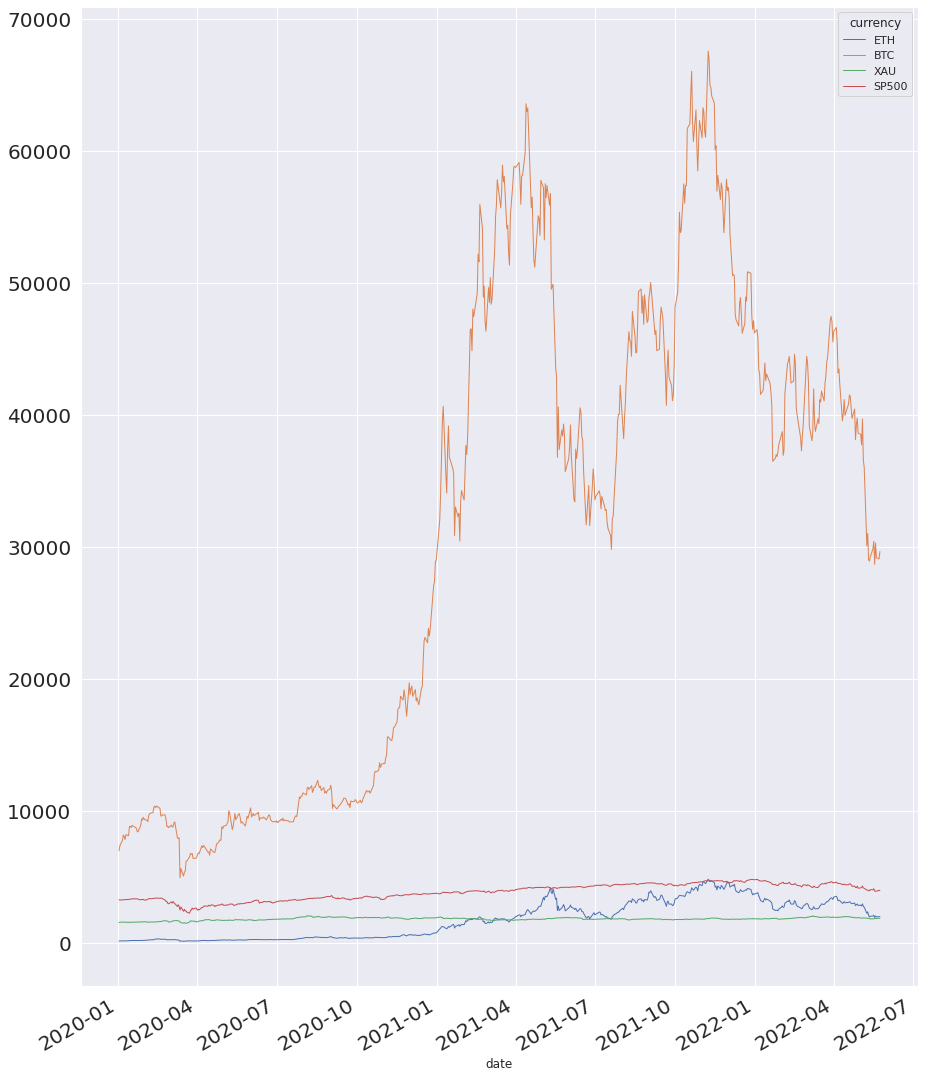

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.902925,0.248290,0.924356
BTC,0.902925,1.000000,0.196594,0.872533
XAU,0.248290,0.196594,1.000000,0.377009
SP500,0.924356,0.872533,0.377009,1.000000


In [8]:
#hide ### Koreliacijos matrica.

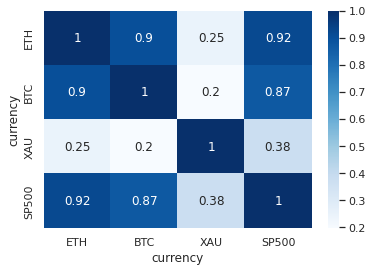

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')